# Data Hackfest Project - Sentiment Analysis/Interactive Menu

My teammate and I are working on a project that involves one me working with Python and the other with C++. For my part, I will be using a simple dataset of random YouTube comments to compare the accuracy of two packages that analyze sentiments from texts. My teammate will use the updated dataset with the predicted sentiments of the comments from both packages to create an interactive menu.

# Data Loading:

In [1]:
!pip install textblob
import pandas as pd
from textblob import TextBlob  
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
df = pd.read_csv('CSV_Files/YoutubeCommentsDataSet.csv') 
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


As you can see, the dataset only has two columns, "Comment" and "Sentiment", meaning all I'll have to analyze is the "Comment" column.

# Sentiment Analysis with TextBlob:

Next, I'm going to utilize TextBlob, which will help me analyze the sentiment of the text given its built-in language processing abilities. With this, it can specifically label each comment in the dataset.

In [3]:
def get_sentiment(text):
    positivity = TextBlob(str(text)).sentiment.polarity
    if positivity > 0:
        return "positive"
    elif positivity < 0:
        return "negative"
    else:
        return "neutral"

Now, I'm going to apply the function I defined to the comments to see what TextBlob thinks of it:

In [4]:
df["TextBlob_Prediction"] = df["Comment"].apply(get_sentiment)
df.head()

,Comment,Sentiment,TextBlob_Prediction
0,lets not forget that apple pay in 2014 require...,neutral,positive
1,here in nz 50 of retailers don’t even have con...,negative,positive
2,i will forever acknowledge this channel with t...,positive,neutral
3,whenever i go to a place that doesn’t take app...,negative,negative
4,apple pay is so convenient secure and easy to ...,positive,positive


In [5]:
df.tail()

,Comment,Sentiment,TextBlob_Prediction
18403,i really like the point about engineering tool...,positive,positive
18404,i’ve just started exploring this field and thi...,positive,positive
18405,excelente video con una pregunta filosófica pr...,neutral,negative
18406,hey daniel just discovered your channel a coup...,positive,neutral
18407,this is great focus is key a playful approach ...,positive,positive


Based on what we can see between the original and predicted sentiments, it seems that there are some slight disagreements between the two. Sometimes, the original sentiment is negative, when the predicted is positive. Or, it might originally be neutral, but predicted to be negative.

For a solid conclusion, however, I'm going to find out exactly how accurate this model is by dividing how many it got correct by the total amount of rows in the dataframe.

# Accuracy Evaluation:

In [6]:
correct = (df["Sentiment"] == df["TextBlob_Prediction"]).sum()
total = len(df)
accuracy = correct / total
accuracy

0.6768796175575836

I see that this model is about 67% accurate, which means that two out of every three comments were accurately predicted by textblob.

# Visualization:

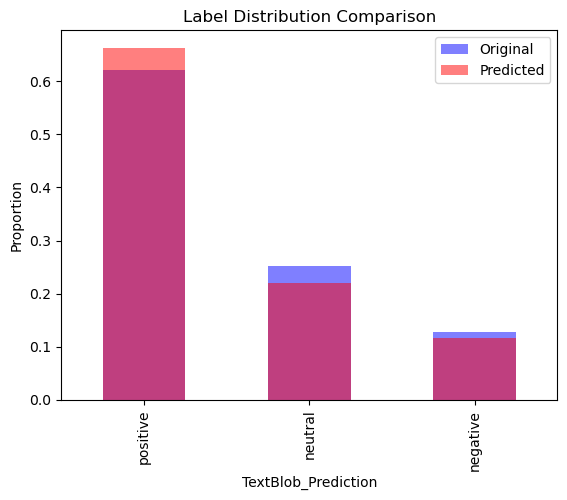

In [7]:
df["Sentiment"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, label="Original", color="blue")
df["TextBlob_Prediction"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, label="Predicted", color="red")
plt.title("Label Distribution Comparison")
plt.ylabel("Proportion")
plt.legend()
plt.show()

# Comparison With Vader: 
I will now compare the accuracy of the TextBlob package with Vader package.

In [8]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [9]:
analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    positivity = analyzer.polarity_scores(str(text))
    if positivity['compound'] >= 0.05:
        return 'positive'
    elif positivity['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Vader_Prediction'] = df['Comment'].apply(get_vader_sentiment)
df.head()

,Comment,Sentiment,TextBlob_Prediction,Vader_Prediction
0,lets not forget that apple pay in 2014 require...,neutral,positive,positive
1,here in nz 50 of retailers don’t even have con...,negative,positive,positive
2,i will forever acknowledge this channel with t...,positive,neutral,positive
3,whenever i go to a place that doesn’t take app...,negative,negative,negative
4,apple pay is so convenient secure and easy to ...,positive,positive,positive


# Vader Accuracy Evaluation:

In [10]:
correct = (df["Sentiment"] == df["Vader_Prediction"]).sum()
total = len(df)
accuracy = correct / total
accuracy

0.7106692742285963

The overall accuracy for VADER is about 71%, 4% better than TextBlob, most likely because this package is designed to interpret the behavior of social media interactions as opposed to TextBlob's more general purpose. This tells us that choosing the correct tools for your data is important in machine learning.

# Visualation #2:

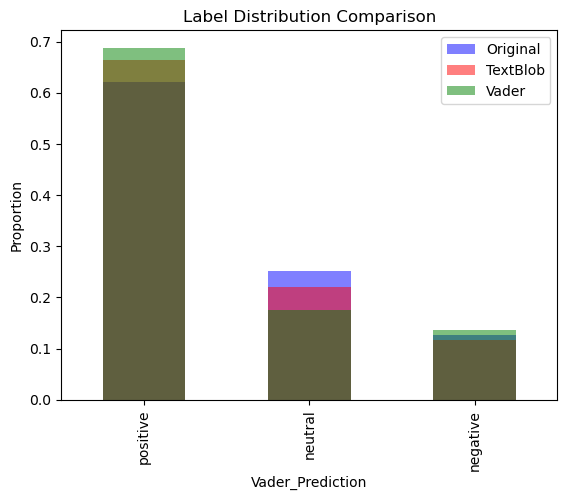

In [11]:
df["Sentiment"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, label="Original", color="blue")
df["TextBlob_Prediction"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, label="TextBlob", color="red")
df["Vader_Prediction"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, label="Vader", color="green")
plt.title("Label Distribution Comparison")
plt.ylabel("Proportion")
plt.legend()
plt.show()

In [12]:
df.to_csv("YTSentimentPredictions.csv", index=False) # Creating a new csv for my teammate.